<a href="https://colab.research.google.com/github/mrym-butt/cat-vs-dog-image_classification/blob/main/Copy_of_cat_vs_dog_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:03<00:00, 260MB/s]
100% 1.06G/1.06G [00:03<00:00, 287MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size= (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size= (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds= train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.2004 - accuracy: 0.6206 - val_loss: 0.6161 - val_accuracy: 0.6514
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5365 - accuracy: 0.7355 - val_loss: 0.5724 - val_accuracy: 0.7248
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4503 - accuracy: 0.7945 - val_loss: 0.4525 - val_accuracy: 0.7920
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3967 - accuracy: 0.8250 - val_loss: 0.5851 - val_accuracy: 0.7786
Epoch 5/10
625/625 [==============================] - 83s 133ms/step - loss: 0.3275 - accuracy: 0.8583 - val_loss: 0.4445 - val_accuracy: 0.8362
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2575 - accuracy: 0.8915 - val_loss: 0.5142 - val_accuracy: 0.8046
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1744 - accuracy: 0.9312 - val_loss: 0.5235 - val_ac

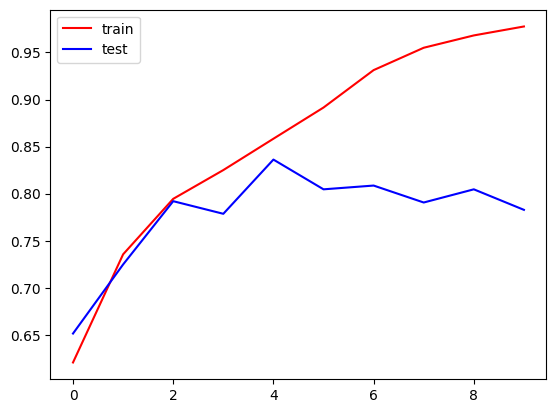

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

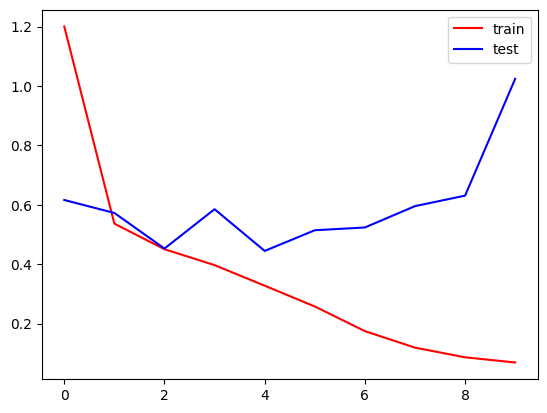

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

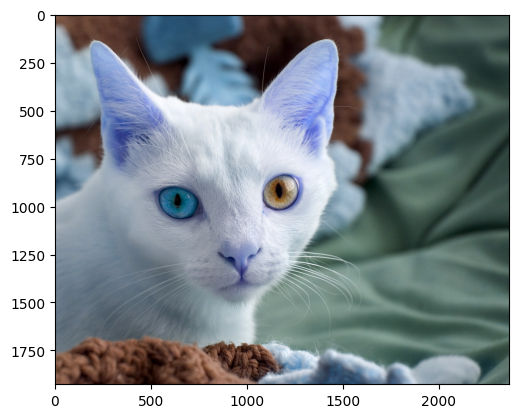

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1927, 2370, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)